In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [65]:
df.head()
df = df.drop("False", axis = 1)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python', 'R', 'spark', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [4]:

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

## hourly wage to annual 

#remove new line from job title

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

data scientist    504
data engineer     206
na                169
analyst            77
manager            30
mle                11
director            3
Name: job_simp, dtype: int64

In [8]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [9]:
# Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [27]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

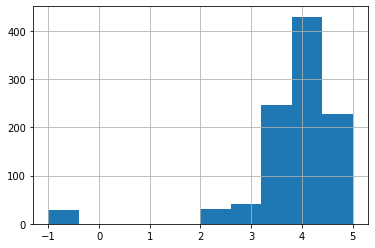

In [31]:
# Histogram of Company Rating
df.Rating.hist()

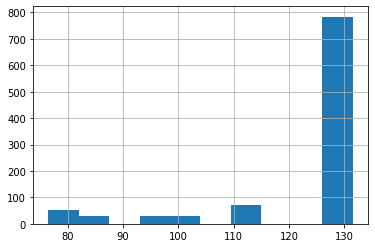

In [30]:
# Histogram of Average Salary
df.avg_salary.hist()

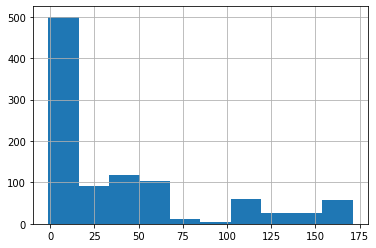

In [32]:
df.age.hist()

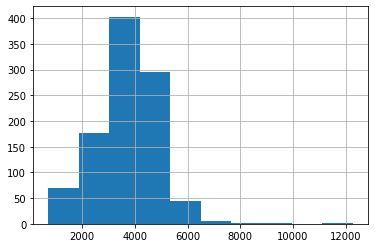

In [33]:
df.desc_len.hist()

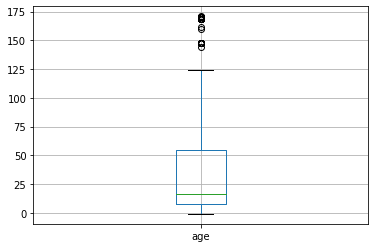

In [41]:
df.boxplot(column = ['age'])

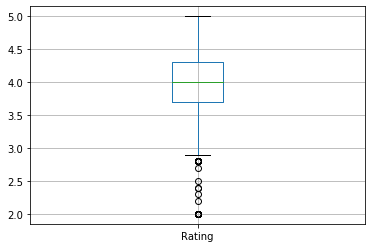

In [56]:
df[df.Rating != -1].boxplot(column = ['Rating'])

In [58]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.034190,-0.163734,0.158853
avg_salary,0.034190,1.000000,0.009950,-0.005299
Rating,-0.163734,0.009950,1.000000,0.105664
desc_len,0.158853,-0.005299,0.105664,1.000000


In [171]:
# Convert to categorical data
df_cat = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'python', 'R', 'spark',
       'excel']].astype('category')

Graph for Size: total = 8


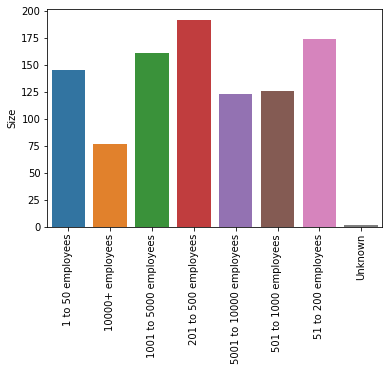

Graph for Type of ownership: total = 7


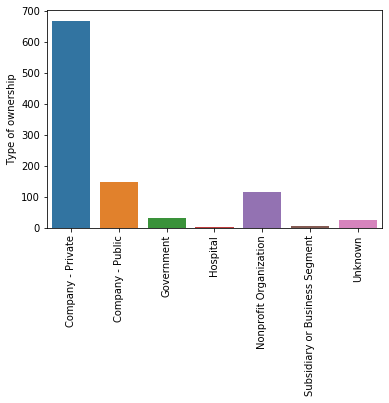

Graph for Industry: total = 39


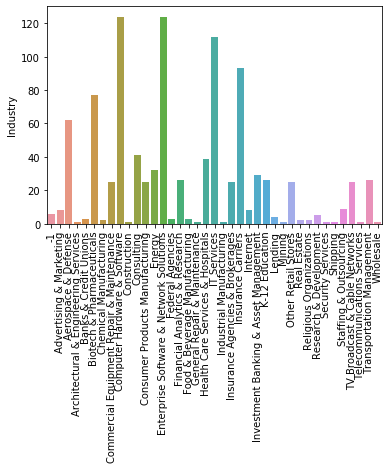

Graph for Sector: total = 20


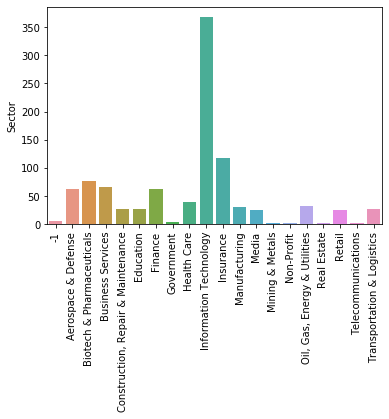

Graph for Revenue: total = 13


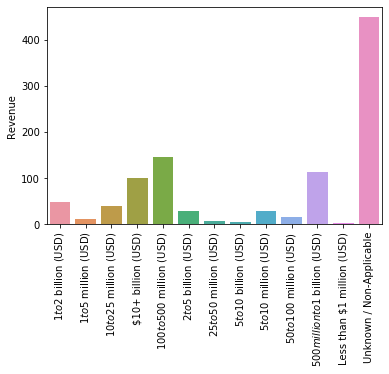

Graph for job_state: total = 35


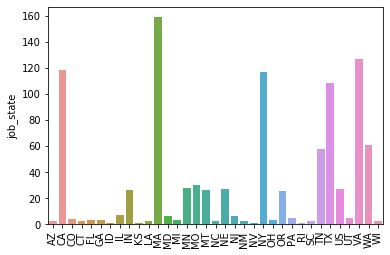

Graph for python: total = 2


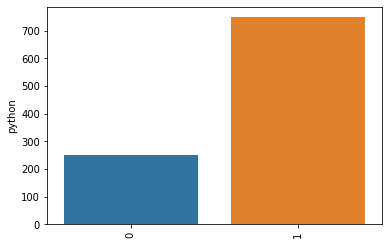

Graph for R: total = 2


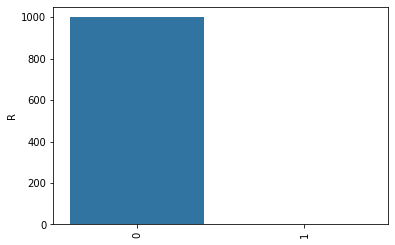

Graph for spark: total = 2


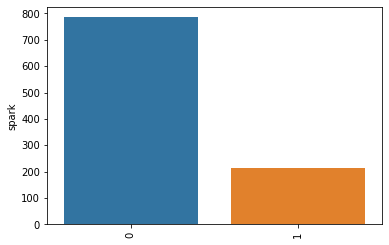

Graph for excel: total = 2


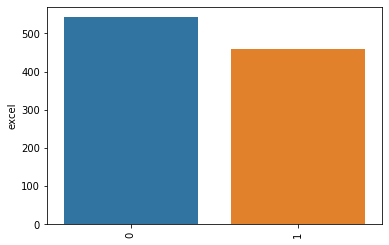

In [172]:
#Histograms for each attribute
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

count    972.000000
mean       3.977058
std        0.626581
min        2.000000
25%        3.700000
50%        4.000000
75%        4.300000
max        5.000000
Name: Rating, dtype: float64

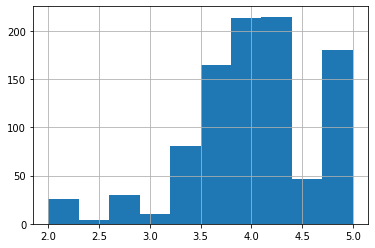

In [170]:
# Histogram of Company Rating
df[df['Rating'] != -1]["Rating"].hist()
df[df['Rating'] != -1]["Rating"].describe()

data scientist    504
data engineer     206
na                169
analyst            77
manager            30
mle                11
director            3
Name: job_simp, dtype: int64

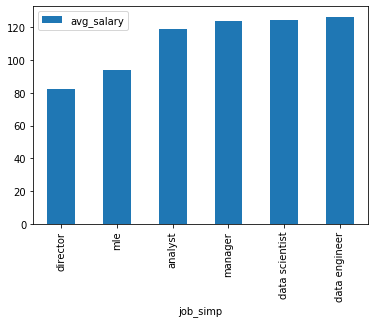

In [208]:
# Bar Chart Showing Average Salary by Job Position
pd.pivot_table(df[df['job_simp']!='na'], index = 'job_simp', values = 'avg_salary').sort_values(by="avg_salary").plot.bar()
df['job_simp'].value_counts()

In [223]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python','R','spark','Type of ownership','avg_salary','excel']]

Rating
        avg_salary
Rating            
 2.0    131.500000
 4.8    128.277778
 5.0    127.791667
-1.0    127.482143
 2.8    127.068966
 4.1    127.000000
 3.7    126.769231
 4.3    126.140449
 4.0    126.008621
 3.9    124.820225
 4.7    123.462687
 3.5    122.166667
 4.4    122.030303
 3.8    121.947761
 3.4    120.585714
 3.3    118.812500
 2.4    112.000000
 4.2    107.666667
 4.6    100.166667
 2.3     99.500000
 2.2     99.500000
 3.6     98.066667
 3.2     97.916667
 4.5     97.500000
 3.0     97.250000
 2.9     94.500000
 4.9     93.500000
 3.1     86.916667
 2.5     81.500000
 2.7     76.500000
Industry
                                           avg_salary
Industry                                             
Other Retail Stores                        131.500000
TV Broadcast & Cable Networks              131.500000
Insurance Agencies & Brokerages            131.500000
Consumer Products Manufacturing            131.500000
Commercial Equipment Repair & Maintenance  131.50000

ValueError: Grouper for 'avg_salary' not 1-dimensional

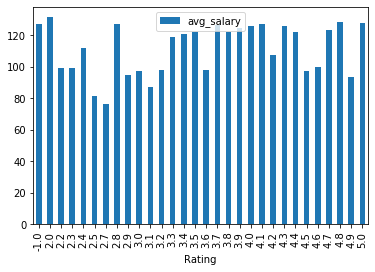

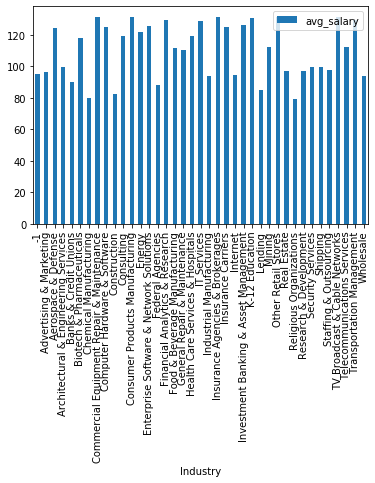

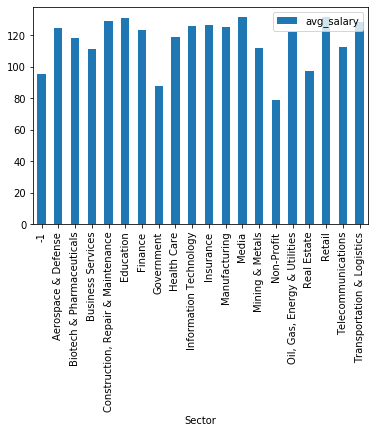

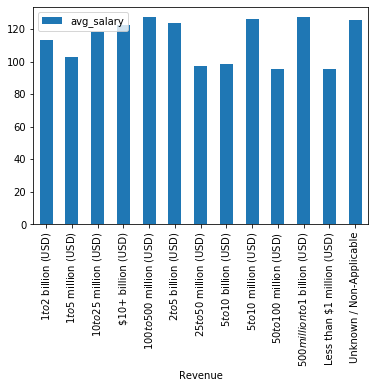

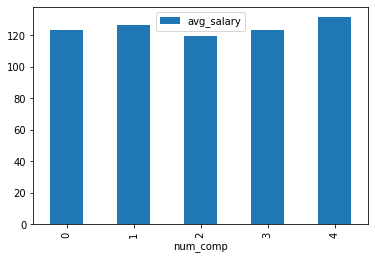

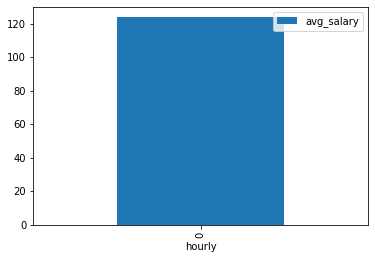

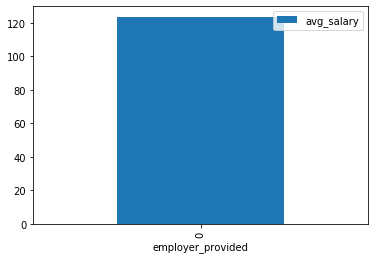

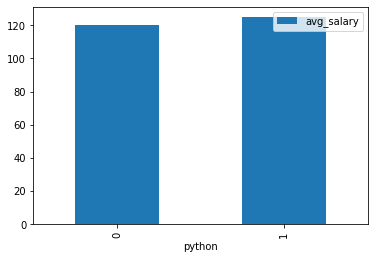

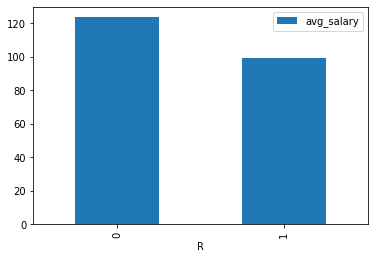

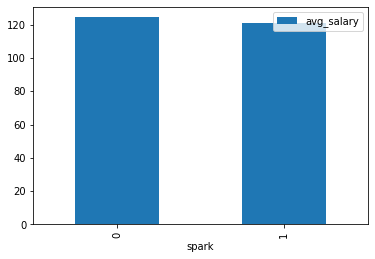

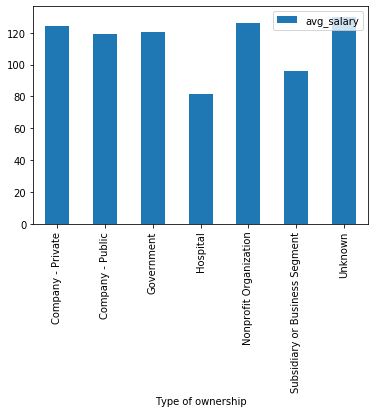

In [224]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    pd.pivot_table(df_pivots, index = i, values = 'avg_salary').plot.bar()

In [225]:
pd.pivot_table(df_pivots, index = "Revenue", columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),33,15
$1 to $5 million (USD),3,8
$10 to $25 million (USD),8,32
$10+ billion (USD),31,69
$100 to $500 million (USD),8,138
$2 to $5 billion (USD),1,29
$25 to $50 million (USD),2,5
$5 to $10 billion (USD),2,3
$5 to $10 million (USD),1,29
